# 시계열 클러스터링

##### 일단 방법들을 탐색하고, 해당 방법이 효과적인지를 알아보기 위해서 전처리하지 않은 데이터에서 군집분석을 진행하여 추후 비교하는 방법을 이용할 계획

클러스터링은 비지도 학습으로 데이터들의 군집을 예측하는 것이 목적이다. 일반적으로는 Kmeans는 각 데이터 사이의 거리를 구해서 군집마다 중심점에 가장 가까운 데이터끼리의 패턴을 찾는다.

하지만 시계열로 되어있는 데이터를 클러스터링 해버리면 시간에 따른 정보가 사라지기 때문에 다른 방법이 필요하다.

클러스터링은 알고리즘이 "실제" 레이블 없이 유사한 데이터 포인트를 그룹화하는 비지도 학습 작업입니다. 데이터 포인트 간의 유사성은 일반적으로 유클리드 거리( Euclidean distance )라고 하는 거리 측정법으로 측정됩니다 .

서로 다른 시계열을 유사한 그룹으로 클러스터링하는 것은 각 데이터 포인트가 순서가 지정된 시퀀스이기 때문에 어려운 클러스터링 작업입니다.

시계열 클러스터링에 대한 가장 일반적인 접근 방식은 시계열을 각 시간 인덱스(또는 시리즈 집계)에 대한 열이 있는 테이블로 평면화하고 k-means 와 같은 표준 클러스터링 알고리즘을 직접 적용하는 것 입니다. (K-평균은 샘플을 k 그룹으로 분할하고 각 클러스터의 제곱합을 최소화하여 데이터 클러스터를 구성하는 일반적인 클러스터링 알고리즘입니다.)

아래 그림과 같이 이것이 항상 잘 작동하는 것은 아닙니다. 차트의 각 부분 그림은 유클리드 거리를 사용하여 k-평균 군집화에 의해 생성된 군집을 표시합니다. 빨간색의 군집 중심은 계열의 모양을 캡처하지 않습니다.

![일반적인 접근방식](https://blog.kakaocdn.net/dn/cAFncP/btrKIqUjBsv/MKjKdgKVaeZWGxpQ6KidJ0/img.png)

##### 시계열에 대한 동적 시간 왜곡 거리 측정법

그러나 먼저 일반적인 유클리드 거리 측정법이 시계열 에 적합하지 않은 이유는 무엇입니까? 요컨대, 데이터의 시간 차원을 무시하고 시간 이동에 불변합니다. 두 시계열이 높은 상관 관계가 있지만 하나가 한 시간 단계만큼 이동하는 경우 유클리드 거리는 더 멀리 떨어져 있는 것으로 잘못 측정합니다. 자세한 예를 보려면 여기 를 클릭 하십시오.

대신 DTW(동적 시간 왜곡)를 사용하여 계열을 비교하는 것이 좋습니다. DTW는 시간, 속도 또는 길이가 정확히 일치하지 않는 두 시간 시퀀스 간의 유사성을 측정하는 기술입니다.

##### DTW 설명

계열 X =(x₀, …, xₙ) 및 계열 Y =(y₀, …, yₘ)가 주어지면 X 에서 Y 까지의 DTW 거리는 다음 최적화 문제로 공식화됩니다.

![dtw](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FcYY1Sd%2FbtrKIxeR78g%2FWxGgIBuDKww6cPDo8kzer0%2Fimg.png)

DTW 방정식을 요약하면 다음과 같습니다. DTW는 X 의 각 요소와 Y 의 가장 가까운 점 사이의 거리 제곱합의 제곱근으로 계산됩니다 . DTW(X, Y) ≠ DTW(Y, X)입니다.

이것을 더 세분화해 보겠습니다.

DTW는 시리즈 X 의 각 요소를 시리즈 Y 의 각 요소와 비교합니다(nxm 비교). 비교 d(xᵢ, yⱼ) 는 단순한 빼기 xᵢ — yⱼ 입니다.

그런 다음 X 의 각 xᵢ 에 대해 DTW는 거리 계산을 위해 Y에서 가장 가까운 점을 선택합니다.

![dtw매칭과 euclidean 매칭 차이](https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FCeHt6%2FbtrKGoi4gvQ%2Fpa0zMIP6df6VVXzaVRDak1%2Fimg.png)

이렇게 하면 X의 각 지점을 Y의 가장 가까운 지점에 정렬하는 X 와 Y 사이에 뒤틀린 "경로"가 생성 됩니다. 경로는 정렬된 계열 간의 유클리드 거리를 최소화하는 시계열의 시간적 정렬입니다.



In [38]:
df_array = df.values
df_array

array([[36,  4, 16, ..., 65,  8, 30],
       [36,  4, 15, ..., 65,  8, 29],
       [34,  4, 14, ..., 61,  8, 27],
       ...,
       [35,  6, 18, ..., 27,  7, 32],
       [41,  7, 21, ..., 32,  8, 38],
       [39,  7, 21, ..., 36,  9, 42]])

In [40]:
# km = TimeSeriesKMeans(n_clusters=4, verbose=False, random_state=42, n_jobs=-1, metric='dtw')
# y_pred = km.fit_predict(df_array)

In [41]:
# df_TSK = df.copy()
# df_TSK['label'] = y_pred
# df_TSK

NameError: name 'y_pred' is not defined

In [ ]:
# df_TSK['label'].value_counts()

In [ ]:
# print(f'Inertia: {km.inertia_}')

In [ ]:
# df_TSK_0 = df_TSK[df_TSK['label'] == 0]
# df_TSK_1 = df_TSK[df_TSK['label'] == 1]
# df_TSK_2 = df_TSK[df_TSK['label'] == 2]
# df_TSK_3 = df_TSK[df_TSK['label'] == 3]

In [ ]:
# df_TSK_0

In [ ]:
# df_TSK_0.plot()

In [42]:
df_T = df.T
df_T

날짜,2017-08-01,2017-08-02,2017-08-03,2017-08-04,2017-08-05,2017-08-06,2017-08-07,2017-08-08,2017-08-09,2017-08-10,...,2023-07-22,2023-07-23,2023-07-24,2023-07-25,2023-07-26,2023-07-27,2023-07-28,2023-07-29,2023-07-30,2023-07-31
여성의류,36,36,34,30,31,37,37,36,35,32,...,37,44,41,41,39,37,33,35,41,39
여성언더웨어/잠옷,4,4,4,3,3,5,4,4,4,4,...,6,7,7,7,7,6,5,6,7,7
남성의류,16,15,14,13,13,16,17,16,16,15,...,18,23,22,21,20,19,17,18,21,21
남성언더웨어/잠옷,3,3,3,3,3,4,3,3,3,3,...,2,2,2,2,2,2,2,2,2,2
여성신발,44,44,42,36,35,42,43,42,41,38,...,35,42,38,36,35,31,27,29,34,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
정원/원예용품,6,6,6,6,6,7,7,7,7,7,...,19,21,24,22,21,20,19,17,19,20
수납/정리용품,37,41,39,34,30,38,44,41,43,40,...,9,13,13,12,12,11,10,9,11,12
욕실용품,65,65,61,52,49,62,69,69,66,61,...,27,34,38,35,33,32,28,27,32,36
청소용품,8,8,8,7,6,8,9,9,9,8,...,7,10,10,9,9,8,7,7,8,9


In [43]:
df_T_array = df_T.values
km = TimeSeriesKMeans(n_clusters=4, verbose=False, random_state=42, n_jobs=-1, metric='euclidean')
y_pred = km.fit_predict(df_T_array)

In [44]:
df_T['label'] = y_pred
df_T

날짜,2017-08-01 00:00:00,2017-08-02 00:00:00,2017-08-03 00:00:00,2017-08-04 00:00:00,2017-08-05 00:00:00,2017-08-06 00:00:00,2017-08-07 00:00:00,2017-08-08 00:00:00,2017-08-09 00:00:00,2017-08-10 00:00:00,...,2023-07-23 00:00:00,2023-07-24 00:00:00,2023-07-25 00:00:00,2023-07-26 00:00:00,2023-07-27 00:00:00,2023-07-28 00:00:00,2023-07-29 00:00:00,2023-07-30 00:00:00,2023-07-31 00:00:00,label
여성의류,36,36,34,30,31,37,37,36,35,32,...,44,41,41,39,37,33,35,41,39,2
여성언더웨어/잠옷,4,4,4,3,3,5,4,4,4,4,...,7,7,7,7,6,5,6,7,7,1
남성의류,16,15,14,13,13,16,17,16,16,15,...,23,22,21,20,19,17,18,21,21,3
남성언더웨어/잠옷,3,3,3,3,3,4,3,3,3,3,...,2,2,2,2,2,2,2,2,2,1
여성신발,44,44,42,36,35,42,43,42,41,38,...,42,38,36,35,31,27,29,34,32,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
정원/원예용품,6,6,6,6,6,7,7,7,7,7,...,21,24,22,21,20,19,17,19,20,3
수납/정리용품,37,41,39,34,30,38,44,41,43,40,...,13,13,12,12,11,10,9,11,12,0
욕실용품,65,65,61,52,49,62,69,69,66,61,...,34,38,35,33,32,28,27,32,36,2
청소용품,8,8,8,7,6,8,9,9,9,8,...,10,10,9,9,8,7,7,8,9,1


In [45]:
df_TSK_0 = df_T[df_T['label'] == 0]
df_TSK_1 = df_T[df_T['label'] == 1]
df_TSK_2 = df_T[df_T['label'] == 2]
df_TSK_3 = df_T[df_T['label'] == 3]

In [46]:
df_0 = df_TSK_0.T
df_0.drop('label', axis=0, inplace=True)
df_1 = df_TSK_1.T
df_1.drop('label', axis=0, inplace=True)
df_2 = df_TSK_2.T
df_2.drop('label', axis=0, inplace=True)
df_3 = df_TSK_3.T
df_3.drop('label', axis=0, inplace=True)

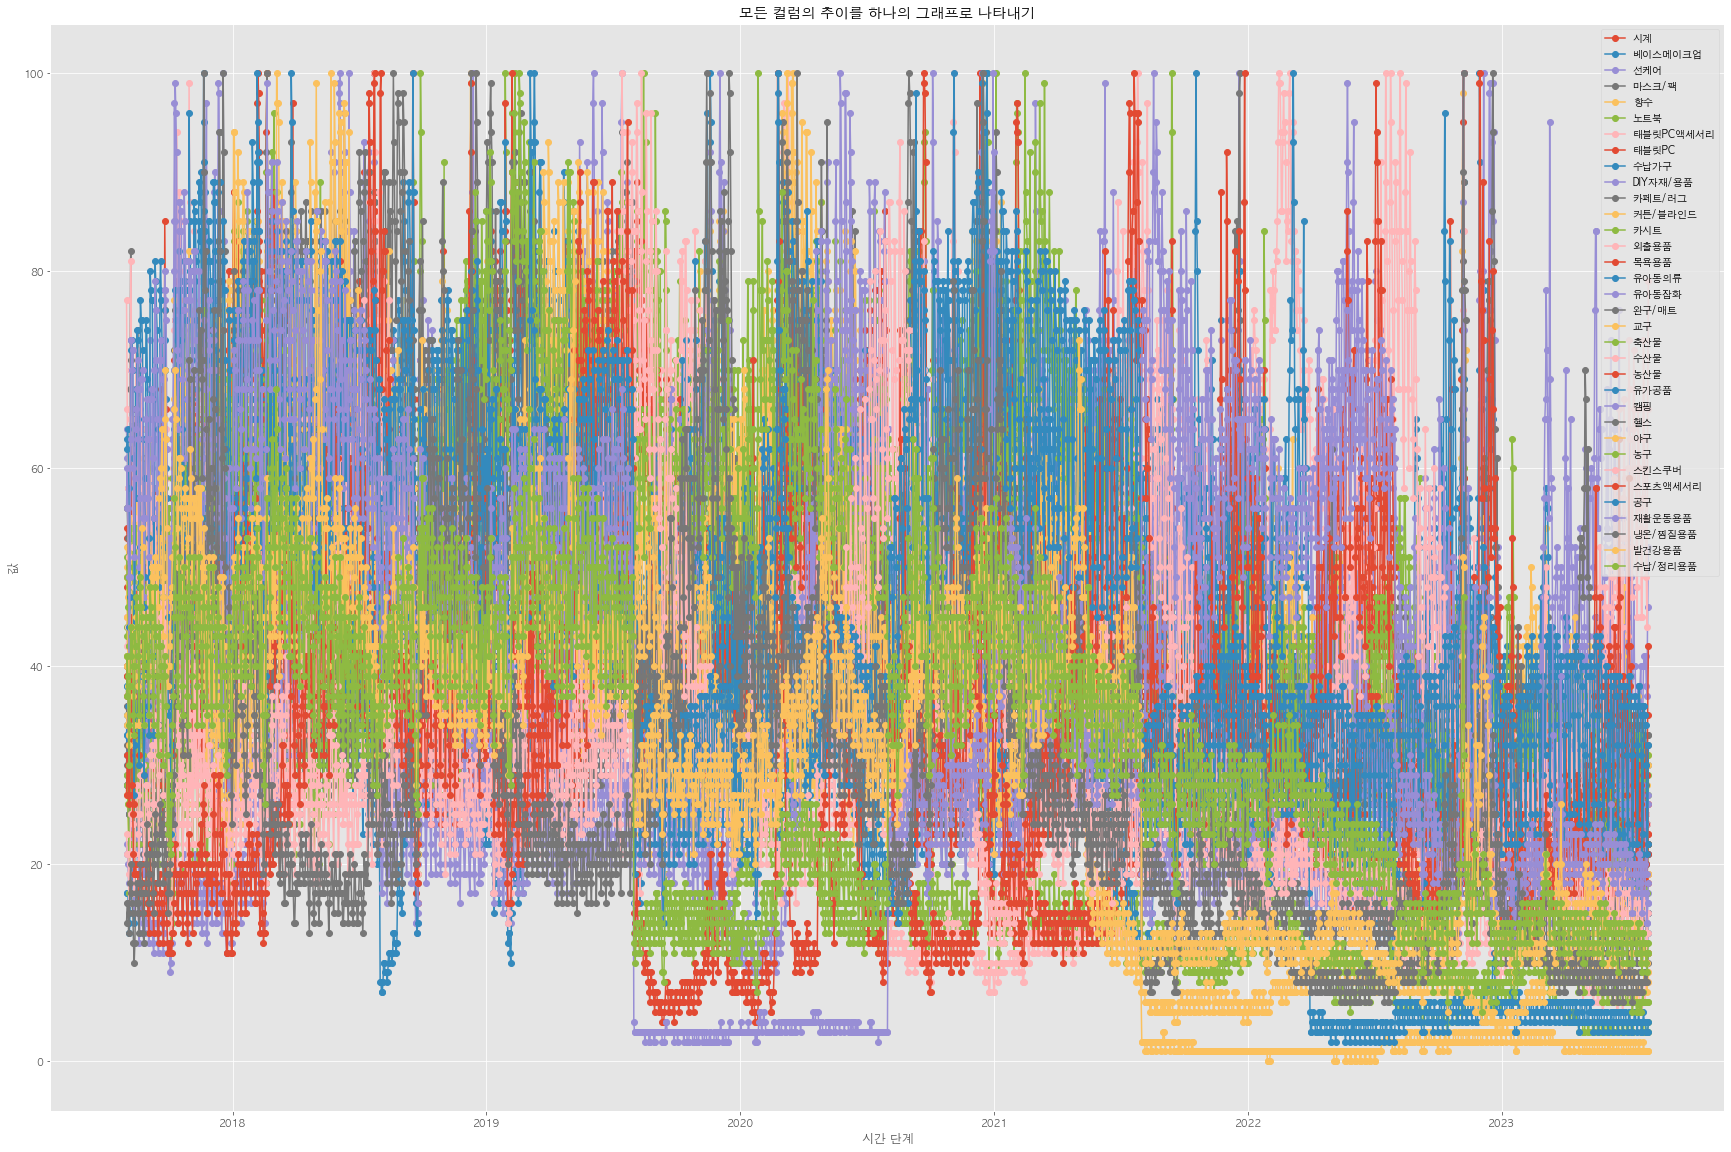

In [47]:
# 컬럼 별로 추이를 하나의 그래프 안에 나타내기
plt.figure(figsize=(30, 20))
for column in df_0.columns:
    plt.plot(df_0.index, df_0[column], marker='o', label=column)

plt.title("모든 컬럼의 추이를 하나의 그래프로 나타내기")
plt.xlabel("시간 단계")
plt.ylabel("값")
plt.legend()
plt.grid(True)
plt.show()

- TimeSeriesKMeans

In [48]:
# n_cluster = 10  #튜닝 작업을 거치며 10개로 결정했습니다.
# km = TimeSeriesKMeans(n_clusters=n_cluster, metric="euclidean", max_iter=150).fit(df) # normalization 시계열 데이터를 활용해 euclidean 기반 클러스터링을 진행합니다.
# rlt_tsm = km.predict(df)

In [51]:
# # 데이터 전처리 (표준화)
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(df)

# # TimeSeriesKMeans 모델 초기화
# n_clusters = 3
# tskmeans = TimeSeriesKMeans(n_clusters=n_clusters, metric='euclidean', verbose=True, random_state=0)

# cluster_labels = tskmeans.fit_predict(scaled_data)

# # 결과 시각화
# plt.figure(figsize=(12, 6))
# for i in range(n_clusters):
#     cluster_data = scaled_data[cluster_labels == i]
#     plt.plot(cluster_data.T, label=f'Cluster {i+1}')
# plt.title('Clustered Time Series Data')
# plt.xlabel('Time Step')
# plt.ylabel('Standardized click rate')
# plt.legend()
# plt.tight_layout()
# plt.show()

In [52]:
# cluster_data.T

시계열 데이터에서 군집 분석을 수행하려면 몇 가지 접근 방법을 고려할 수 있습니다. 시계열 데이터의 특성을 고려하여 데이터 전처리 및 군집화 알고리즘 선택에 주의해야 합니다.

다음은 시계열 데이터에 대한 군집 분석을 수행하는 일반적인 단계와 고려사항입니다:

1. 데이터 전처리:
- 시계열 데이터의 경우 시간 간격, 빈 공간 처리 등에 주의해야 합니다. 데이터가 누락된 경우 보간(interpolation) 기법을 사용하여 누락 값을 대체할 수 있습니다.

2. 특성 추출:
- 시계열 데이터를 군집화하기 위해 적절한 특성을 추출해야 합니다. 주로 통계량 (예: 평균, 분산), 주파수 도메인 특성 (예: 주파수 분포) 등을 활용합니다.

3. 유사도/거리 측정:
- 군집 분석을 위해 적절한 유사도 또는 거리 측정 방법을 선택해야 합니다. 시계열 데이터의 경우 유클리디안 거리 외에도 동적 시간 왜곡(DTW) 등의 거리 측정 방법을 고려할 수 있습니다.

4. 군집 알고리즘 선택: 
- 시계열 데이터에 적합한 군집 알고리즘을 선택해야 합니다. K-means, 계층적 군집화, DBSCAN 등을 활용할 수 있습니다. 하지만 시계열 데이터의 특성을 고려하여 알고리즘을 선택하고 매개변수를 조정해야 합니다.

5. 군집화 평가:
- 군집화 결과를 평가하고 해석하는 것이 중요합니다. 실루엣 스코어, 엘보우 메서드, 시각화 등을 활용하여 군집화 품질을 평가할 수 있습니다.

6. 결과 해석:
- 군집화 결과를 시각화하고 해석하여 의미 있는 인사이트를 얻어내는 것이 중요합니다. 시계열 데이터의 경우 군집화된 그룹들 간의 시계열 패턴 비교 및 분석이 필요합니다.
시계열 데이터의 군집 분석은 데이터의 특성과 목표에 따라 다양한 방법을 활용할 수 있습니다. 이러한 단계와 고려사항을 기반으로 데이터를 탐색하고 의미 있는 군집 결과를 도출할 수 있을 것입니다.


PCA (Principal Component Analysis)는 주로 연속형 수치 데이터의 차원을 축소하는데 사용되며, 시계열 데이터에도 적용할 수 있습니다. 그러나 시계열 데이터의 경우 일부 추가 고려사항이 있습니다.

PCA를 시계열 데이터에 적용하기 전에 고려해야 할 사항은 다음과 같습니다:

1. 데이터 정규화: PCA는 변수 간 스케일 차이가 크게 영향을 미칠 수 있기 때문에 데이터를 정규화하는 것이 중요합니다. 특히 시계열 데이터에서는 시간에 따라 스케일이 변하는 경우가 많기 때문에 정규화 과정을 신중하게 수행해야 합니다.

2. 시간 구조: PCA는 변수 간의 선형 관계를 강조하기 때문에 시계열 데이터의 시간 구조를 무시할 수 있습니다. 시간적인 패턴과 상관관계를 유지하면서 차원 축소를 하려면 주성분 시간 의존성을 고려하는 다른 방법을 고려해야 할 수 있습니다.

3. 고차원 데이터: 시계열 데이터는 고차원일 수 있으며, PCA를 적용하면 계산 비용이 증가할 수 있습니다. 이에 대한 성능 및 계산 비용 고려가 필요합니다.

4. 해석 가능성: PCA는 변수들을 새로운 주성분 축으로 변환하는 것이기 때문에, 결과 해석이 어려울 수 있습니다. 시계열 데이터의 의미 있는 시간적인 변화나 패턴을 유지하며 축소할 수 있는 다른 방법을 고려할 수 있습니다.

시계열 데이터에 PCA를 적용하려면 위의 고려사항을 고려하여 데이터를 전처리하고, 데이터의 성격과 목표에 맞게 PCA를 수행하거나 다른 차원 축소 기법을 고려할 필요가 있습니다. 데이터의 특성과 분석 목적에 따라 적절한 방법을 선택하고 적용하는 것이 중요합니다.


시계열 데이터에서 PCA를 적용할 때 주의해야 할 "시간 구조"에 대해 좀 더 자세히 설명해 드리겠습니다.

PCA는 변수 간의 선형 관계를 찾아내는 차원 축소 기법으로, 주성분들을 찾아내어 데이터를 새로운 축으로 변환합니다. 하지만 시계열 데이터는 시간에 따라 변화하는 동적인 특성을 가지고 있어, 시간 구조를 무시하면 데이터의 중요한 정보가 손실될 수 있습니다.

예를 들어, 주식 가격 데이터나 기후 데이터와 같이 시간적인 변동이 중요한 경우를 생각해보겠습니다. 이러한 데이터에서 PCA를 단순히 적용하면 주성분들이 시간적인 패턴을 고려하지 않고 변수들 간의 변동성만을 고려할 수 있습니다. 결과적으로 PCA로 변환한 데이터는 시간적인 패턴을 잃어버릴 수 있습니다.

이러한 문제를 해결하려면 PCA 대신 시간 구조를 고려한 다른 차원 축소 기법을 고려할 수 있습니다. 몇 가지 대안적인 방법은 다음과 같습니다:

1. 시계열 특성을 추가: 시계열 데이터를 변환하기 전에, 원본 데이터에 시간적인 특성을 추가하여 시간 구조를 보존할 수 있습니다. 예를 들어, 시간 간격을 나타내는 열을 추가하거나, 주기성이 있는 데이터의 경우 주기성을 나타내는 열을 추가할 수 있습니다.

2. Dynamic Time Warping (DTW): DTW는 두 시계열 데이터 간의 유사성을 측정하는 방법으로, 시간적인 패턴을 고려하여 거리를 계산합니다. DTW를 사용하여 시계열 데이터를 비교하고, 이를 기반으로 차원 축소를 진행할 수 있습니다.

3. Time Series Embedding: 시계열을 저차원 공간에 임베딩하는 방법 중 하나로, 시간 구조를 보존하면서 차원 축소를 할 수 있습니다. 예를 들어, SAX (Symbolic Aggregate approXimation)와 같은 방법을 사용할 수 있습니다.

위의 방법 중 하나를 선택하여 시계열 데이터의 시간 구조를 고려한 차원 축소를 수행하면, 데이터의 시계열 패턴을 유지하면서도 차원을 축소할 수 있습니다.


주기성을 나타내는 열을 추가하는 방법은 시계열 데이터의 주기성을 고려하여 시간에 따른 패턴을 더 잘 나타낼 수 있도록 도와줍니다. 이를 통해 PCA나 다른 차원 축소 기법을 적용할 때 주기성을 보존하면서 차원을 축소할 수 있습니다. 주기성을 나타내는 열을 추가하는 몇 가지 방법은 다음과 같습니다:

1. 날짜와 시간 정보 활용: 날짜와 시간 정보를 추출하여 주기성을 나타내는 열을 추가할 수 있습니다. 예를 들어, 연도, 월, 일, 요일, 시간대 등의 정보를 추출하여 각각의 열로 추가할 수 있습니다. 이러한 열은 주기성을 나타내는 특성을 가질 수 있습니다.

2. 사인 및 코사인 변환: 사인(sin)과 코사인(cos) 함수는 주기성을 나타내는 데 유용하게 활용될 수 있습니다. 시간에 따른 사인 및 코사인 변화를 나타내는 열을 추가하여 주기성을 나타낼 수 있습니다. 이러한 변환은 주로 계절성이나 주기성이 있는 데이터에 유용합니다.

3. 푸리에 변환: 푸리에 변환은 시간 도메인의 시계열 데이터를 주파수 도메인으로 변환합니다. 주파수 도메인에서 주기성이 뚜렷하게 드러날 수 있으며, 푸리에 변환을 통해 주기성을 나타내는 열을 생성할 수 있습니다.

4. 라그 특성: 현재 시점의 값과 과거 시점의 값을 비교하여 변화를 나타내는 라그(lag) 특성을 추가할 수 있습니다. 이를 통해 주기성이나 계절성을 나타내는 열을 생성할 수 있습니다.

이러한 방법들을 활용하여 주기성을 나타내는 열을 추가하면, 시계열 데이터의 주기성을 보존하면서도 차원을 축소할 수 있습니다. 주기성을 나타내는 열을 추가할 때는 데이터의 특성과 분석 목적에 따라 적절한 방법을 선택하여 적용하면 됩니다.